# Crunchbase Snapshot © 2013 Data Analysis Notebook

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import pandas
from pandas import DataFrame as df
import numpy as np
# import sklearn as sk
import plotly as py
from plotly.graph_objs import *
import igraph as ig

# CSS files for more aesthetically pleasing inline tables.
from IPython.core.display import HTML
css = open('css/style-table.css').read() + open('css/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

## Import Crunchbase 2013 Snapshot CSV files.

In [3]:
cb_acquisitions = df.from_csv('csv/cb_acquisitions.csv').reset_index('id')
cb_funding_rounds = df.from_csv('csv/cb_funding_rounds.csv').reset_index('id')
cb_funds = df.from_csv('csv/cb_funds.csv').reset_index('id')
cb_investments = df.from_csv('csv/cb_investments.csv').reset_index('id')
cb_ipos = df.from_csv('csv/cb_ipos.csv').reset_index('id')
cb_milestones = df.from_csv('csv/cb_milestones.csv').reset_index('id')
cb_objects = df.from_csv('csv/cb_objects.csv').reset_index('id')
cb_offices = df.from_csv('csv/cb_offices.csv').reset_index('id')
cb_people = df.from_csv('csv/cb_people.csv').reset_index('id')
cb_relationships = df.from_csv('csv/cb_relationships.csv').reset_index('id')

## Visualize data frames.

In [57]:
cb_acquisitions.head()
# cb_funding_rounds.head(1)
# cb_funds.head(1)
# cb_investments.head(1)
# cb_ipos.head(1)
# cb_milestones.head(1)
# cb_objects.head(1)
# cb_offices.head(1)
# cb_people.head(1)
# cb_relationships.head(1)

,id,acquisition_id,acquiring_object_id,acquired_object_id,term_code,price_amount,price_currency_code,acquired_at,source_url,source_description
0,1,1,c:11,c:10,NaN,20000000.0,USD,2007-05-30,http://venturebeat.com/2007/05/30/fox-interact...,Fox Interactive confirms purchase of Photobuck...
1,2,7,c:59,c:72,cash,60000000.0,USD,2007-07-01,http://www.techcrunch.com/2007/07/02/deal-is-c...,Deal is Confirmed: Google Acquired GrandCentral
2,3,8,c:24,c:132,cash,280000000.0,USD,2007-05-01,http://www.techcrunch.com/2007/05/30/cbs-acqui...,CBS Acquires Europe’s Last.fm for $280 million
3,4,9,c:59,c:155,cash,100000000.0,USD,2007-06-01,http://techcrunch.com/2007/05/23/100-million-p...,$100 Million Payday For Feedburner
4,5,10,c:212,c:215,cash,25000000.0,USD,2007-07-01,http://blog.seattlepi.nwsource.com/venture/arc...,seatlepi.com


## Build igraph networks.

1515

#### Acquisitions

In [81]:
# Declare an empty graph for acquisitions.
acquisitions = ig.Graph()

# Remove rows that report companies who've acquired themselves...
cb_acquisitions = cb_acquisitions[(cb_acquisitions['acquiring_object_id'] != cb_acquisitions['acquired_object_id'])]

# Calculate the number of unique acquirers and acquirees
unique_acquirers = cb_acquisitions['acquiring_object_id'].unique()
unique_acquirees = cb_acquisitions['acquired_object_id'].unique()
# Append both acquirers and acquirees into one np.array.
nodes = np.append(unique_acquirers, unique_acquirees)
# Remove duplicates.
unique_nodes = np.unique(nodes)

# Add appropriate number of vertices to the acquisitions graph.
acquisitions.add_vertices(len(unique_nodes))

# Declare and initialize vertex attributes.
acquisitions.vs['acquiring_object_id'] = cb_acquisitions['acquiring_object_id'].unique()
acquisitions.vs['acquired_object_id'] = cb_acquisitions['acquired_object_id'].unique()

# Connect edges between vertices.

# Declare and initialize edge attributes.
# acquisitions.es['price_amount'] = cb_acquisitions['price_amount']
# acquisitions.es['acquired_at'] = cb_acquisitions['acquired_at']

## Visualize networks with plotly.

In [7]:
# Relationships

In [11]:
# Average number of relationships per company.
avg_relationships = np.average(cb_objects[(cb_objects.relationships.notnull())].relationships)
"Average relationships: {:,.2}".format(avg_relationships)

'Average relationships: 4.3'

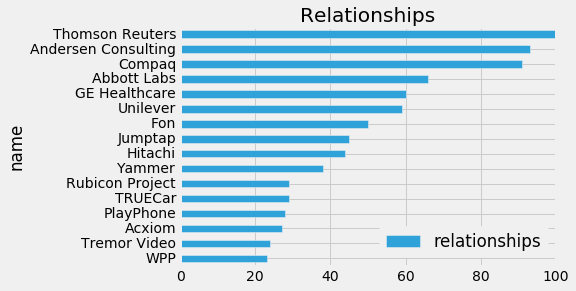

In [121]:
# Visualize number of relationships in companies, only those with 5x average.
x = cb_objects[(cb_objects.relationships > avg_relationships * 5)]
x = x.sort_values(by = 'relationships', ascending = True)
x = x.plot(x = 'name', y = 'relationships', kind = 'barh', title = 'Relationships')

# Save as an image.
# plt.savefig('plots/avg_relationships.png', format='png', bbox_inches='tight', dpi=1000)

In [ ]:
### FUNDS

In [138]:
# Average funds per company.
avg_funding = np.average(cb_objects[(cb_objects.funding_total_usd.notnull())].funding_total_usd)
avg_funding
"Average funding: {:,}".format(avg_funding)

'Average funding: 14,540,207.953216374'

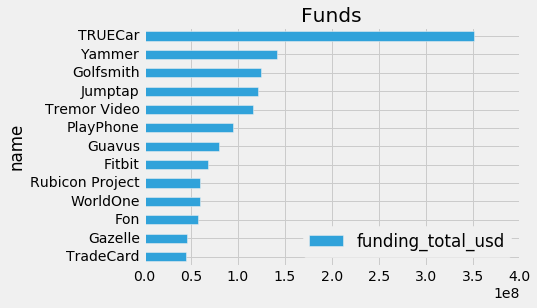

In [150]:
# Visualize funds per company, only showing companies with at least 3x average.
x = cb_objects[(cb_objects.funding_total_usd > avg_funding * 3)]
x = x.sort_values(by = 'funding_total_usd', ascending = True)
x = x.plot(x = 'name', y = 'funding_total_usd', kind = 'barh', title = 'Funds')

'400,000,000'